In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease.csv


In [ ]:
df = pd.read_csv("kidney_disease.csv")

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.drop(columns="id", inplace=True)

In [ ]:
df.shape

(400, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
df.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [ ]:
df.replace("?", np.nan, inplace=True)

In [ ]:
# Convert all columns to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

In [ ]:
# Fill numeric NaN with median, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0


In [ ]:
df['classification'] = df['classification'].str.strip().str.lower()
print(df['classification'].value_counts())

classification
ckd       250
notckd    150
Name: count, dtype: int64


In [ ]:
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("\nCategorical columns encoded successfully.")



Categorical columns encoded successfully.


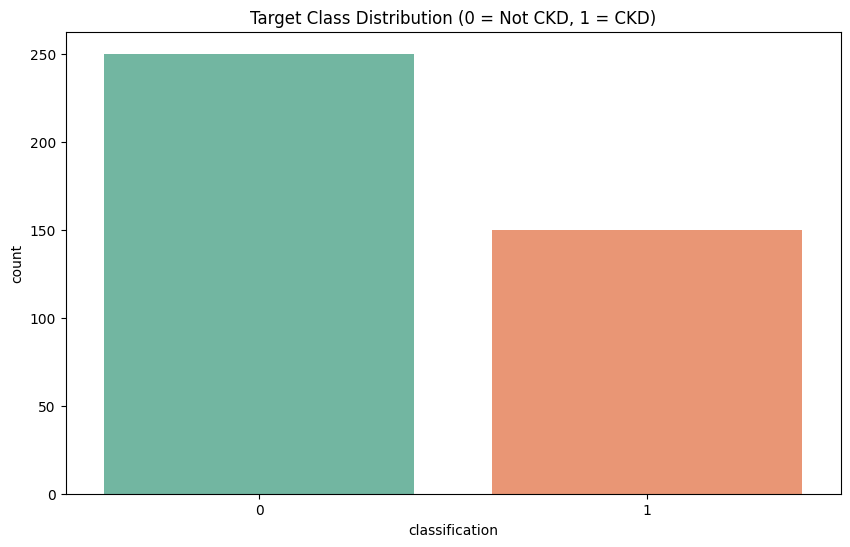

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='classification', data=df, palette='Set2')
plt.title("Target Class Distribution (0 = Not CKD, 1 = CKD)")
plt.show()

In [ ]:
df["classification"].unique()

array([0, 1])

In [ ]:
df['classification'].value_counts()

,count
classification,
0,250
1,150


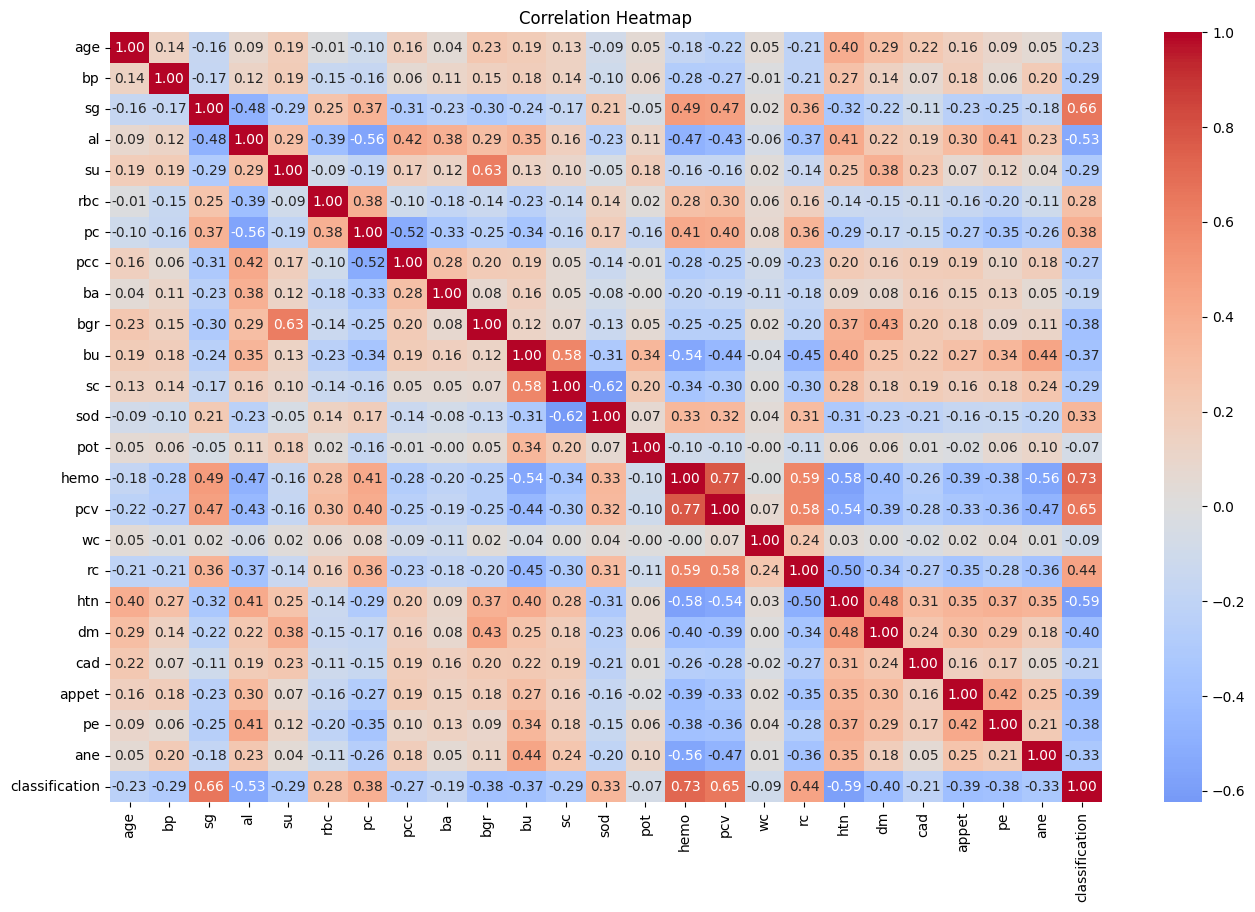

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0,annot=True, fmt= "0.2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Correlation with target
corr_target = df.corr()['classification'].sort_values(ascending=False)
print("\nFeature correlations with target:\n", corr_target)


Feature correlations with target:
 classification    1.000000
hemo              0.726368
sg                0.659504
pcv               0.650531
rc                0.444823
pc                0.375154
sod               0.334900
rbc               0.282642
pot              -0.065218
wc               -0.094409
ba               -0.186871
cad              -0.214320
age              -0.227842
pcc              -0.265313
sc               -0.291245
bp               -0.293693
su               -0.294555
ane              -0.325396
bu               -0.369393
pe               -0.375154
bgr              -0.379321
appet            -0.393341
dm               -0.401490
al               -0.531562
htn              -0.590438
Name: classification, dtype: float64


In [ ]:
X = df.drop('classification', axis=1)
y = df['classification']

In [ ]:
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X, y)
importances = pd.Series(rf_temp.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature importance ranking:\n", importances)


Feature importance ranking:
 hemo     0.174983
sc       0.172966
pcv      0.146239
sg       0.118394
al       0.078755
dm       0.051277
htn      0.049509
rc       0.047434
bu       0.032175
bgr      0.031165
sod      0.031118
wc       0.011234
bp       0.009714
age      0.008888
appet    0.007288
pot      0.007038
pc       0.006008
pe       0.005085
su       0.004839
ane      0.002952
rbc      0.002206
ba       0.000648
cad      0.000086
pcc      0.000000
dtype: float64


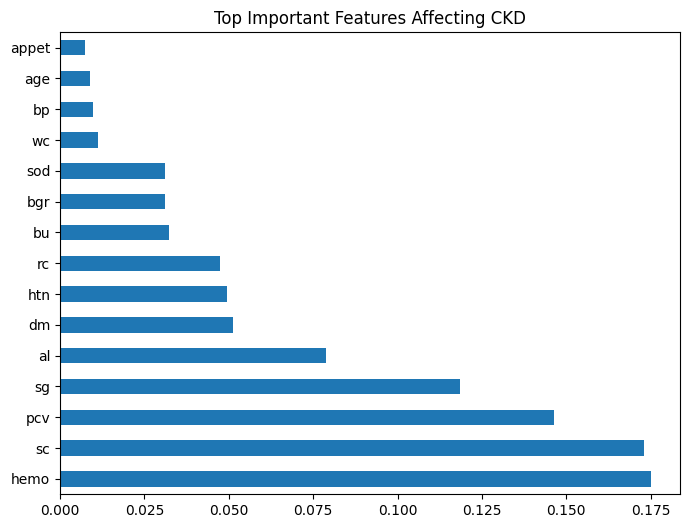

In [ ]:
# Plot
plt.figure(figsize=(8,6))
importances.head(15).plot(kind='barh')
plt.title("Top Important Features Affecting CKD")
plt.show()


In [ ]:
selected_features = importances[importances > 0.02].index.tolist()
print("\nSelected features for model training:\n", selected_features)

X = df[selected_features]
y = df['classification']


Selected features for model training:
 ['hemo', 'sc', 'pcv', 'sg', 'al', 'dm', 'htn', 'rc', 'bu', 'bgr', 'sod']


In [ ]:
X = df[selected_features]
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
y_pred = rf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f"\n✅ Model Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", cr)
print("\nConfusion Matrix:\n", cm)


✅ Model Accuracy: 97.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80


Confusion Matrix:
 [[50  0]
 [ 2 28]]


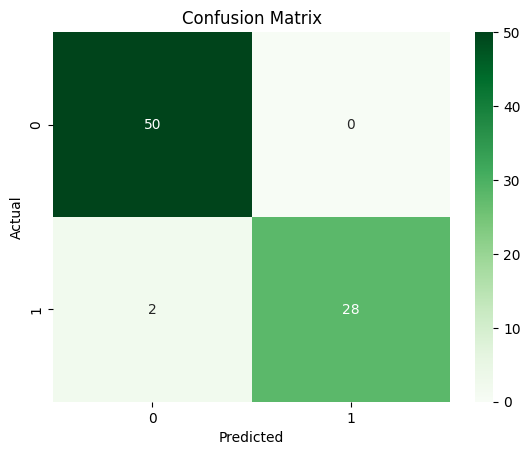

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
joblib.dump(rf, "ckd_rf_final_model.pkl")
joblib.dump(scaler, "ckd_rf_scaler.pkl")
joblib.dump(selected_features, "ckd_rf_features.pkl")

['ckd_rf_features.pkl']

In [ ]:
from google.colab import files

# List of files to download
files_to_download = [
    "ckd_rf_final_model.pkl",
    "ckd_rf_scaler.pkl",
    "ckd_rf_features.pkl"
]

# Download each file
for file in files_to_download:
    try:
        files.download(file)
        print(f"⬇️ Downloading {file} ...")
    except Exception as e:
        print(f"⚠️ Could not download {file}: {e}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading ckd_rf_final_model.pkl ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading ckd_rf_scaler.pkl ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading ckd_rf_features.pkl ...
